In [39]:
import scanpy as sc
import numpy as np
import pandas as pd
import h5py
import scib
import scipy.io as sio

In [40]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=200, frameon=False, figsize=(3,3), facecolor='white')

-----
anndata     0.8.0
scanpy      1.9.1
-----
PIL                 9.2.0
asttokens           NA
backcall            0.2.0
cffi                1.15.1
colorama            0.4.6
comm                0.1.3
cycler              0.10.0
cython_runtime      NA
dateutil            2.8.2
debugpy             1.6.7
decorator           5.1.0
deprecated          1.2.12
executing           1.2.0
google              NA
h5py                3.7.0
harmonypy           NA
igraph              0.10.2
ipykernel           6.23.1
jedi                0.18.2
joblib              1.0.1
kiwisolver          1.3.1
leidenalg           0.9.0
llvmlite            0.39.1
matplotlib          3.4.2
matplotlib_inline   0.1.6
mpl_toolkits        NA
natsort             8.2.0
numba               0.56.3
numpy               1.22.4
packaging           21.3
pandas              1.5.1
parso               0.8.3
patsy               0.5.3
pexpect             4.8.0
pickleshare         0.7.5
pkg_resources       NA
prompt_toolkit      3.0.38

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/_settings.py:447: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


In [41]:
re=0.1

In [42]:
# load raw data
adata = sc.read_h5ad('/home/suyanchi/project/dab/data/batch/human_pancreas.h5ad')
adata

/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/X' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/anndata/_io/h5ad.py:238: OldFormatWarning: Element '/layers' was written without encoding metadata.
  d[k] = read_elem(f[k])
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/anndata/_io/specs/methods.py:92: OldFormatWarning: Element '/layers/counts' was written without encoding metadata.
  return {k: read_elem(v) for k, v in elem.items()}
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/anndata/_io/specs/methods.py:584: OldFormatWarning: Element '/obs/__categories/tech' was written without encoding metadata.
  categories = read_elem(categories_dset)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/anndata/_io/specs/methods.py:587: OldFormatWarning: Element '/obs/tech' 

AnnData object with n_obs × n_vars = 16382 × 19093
    obs: 'tech', 'celltype', 'size_factors'
    layers: 'counts'

In [43]:
dat_sc = sio.loadmat('/home/suyanchi/project/dab/results/human_pancreas.mat')
dat_sc['re']

array([[0.1996171 , 2.6120808 , 0.25438088, ..., 0.42996258, 3.4695568 ,
        0.4566651 ],
       [0.50959307, 0.87298715, 3.311074  , ..., 2.6206095 , 0.64595073,
        0.5159923 ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.25412107, 0.33135763, 0.2868865 , ..., 2.1124895 , 0.09516188,
        0.10920946],
       [0.24031764, 2.6120806 , 0.28849915, ..., 1.0953737 , 0.2208243 ,
        0.53929645],
       [0.20581543, 0.40946692, 0.24228808, ..., 1.0403827 , 0.5980939 ,
        0.50219357]], dtype=float32)

In [44]:
isnan=(np.isnan(dat_sc['re']))
print(True in isnan)

False


In [45]:
adata.X = dat_sc['re'].T

In [46]:
# adata.X[adata.X<0]=0

In [47]:
scib.pp.reduce_data(adata, batch_key='tech')
# sc.tl.pca(adata)
# sc.external.pp.bbknn(adata, batch_key='tech')
sc.external.pp.harmony_integrate(adata, key='tech')
# sc.external.pp.mnn_correct(adata, batch_key='tech')


HVG


/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:478: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  hvg = hvg.append(missing_hvg, ignore_index=True)
/home/suyanchi/program/miniconda/envs/dab/lib/python3.9/site-packages/scanpy/prepr

Using 74 HVGs from full intersect set
Using 186 HVGs from n_batch-1 set
Using 262 HVGs from n_batch-2 set
Using 284 HVGs from n_batch-3 set
Using 375 HVGs from n_batch-4 set
Using 433 HVGs from n_batch-5 set
Using 386 HVGs from n_batch-6 set
Using 2000 HVGs
Computed 2000 highly variable genes
PCA
Nearest Neigbours


2023-07-09 10:29:21,794 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-07-09 10:30:01,595 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-07-09 10:30:01,838 - harmonypy - INFO - Iteration 1 of 10
2023-07-09 10:30:12,230 - harmonypy - INFO - Iteration 2 of 10
2023-07-09 10:30:28,041 - harmonypy - INFO - Iteration 3 of 10
2023-07-09 10:30:54,557 - harmonypy - INFO - Iteration 4 of 10
2023-07-09 10:31:14,739 - harmonypy - INFO - Iteration 5 of 10
2023-07-09 10:31:35,231 - harmonypy - INFO - Iteration 6 of 10
2023-07-09 10:31:54,153 - harmonypy - INFO - Iteration 7 of 10
2023-07-09 10:32:12,245 - harmonypy - INFO - Iteration 8 of 10
2023-07-09 10:32:32,012 - harmonypy - INFO - Converged after 8 iterations


In [48]:
sc.pp.neighbors(adata, use_rep='X_pca_harmony')
# sc.pp.neighbors(adata)

In [49]:
sc.tl.umap(adata)

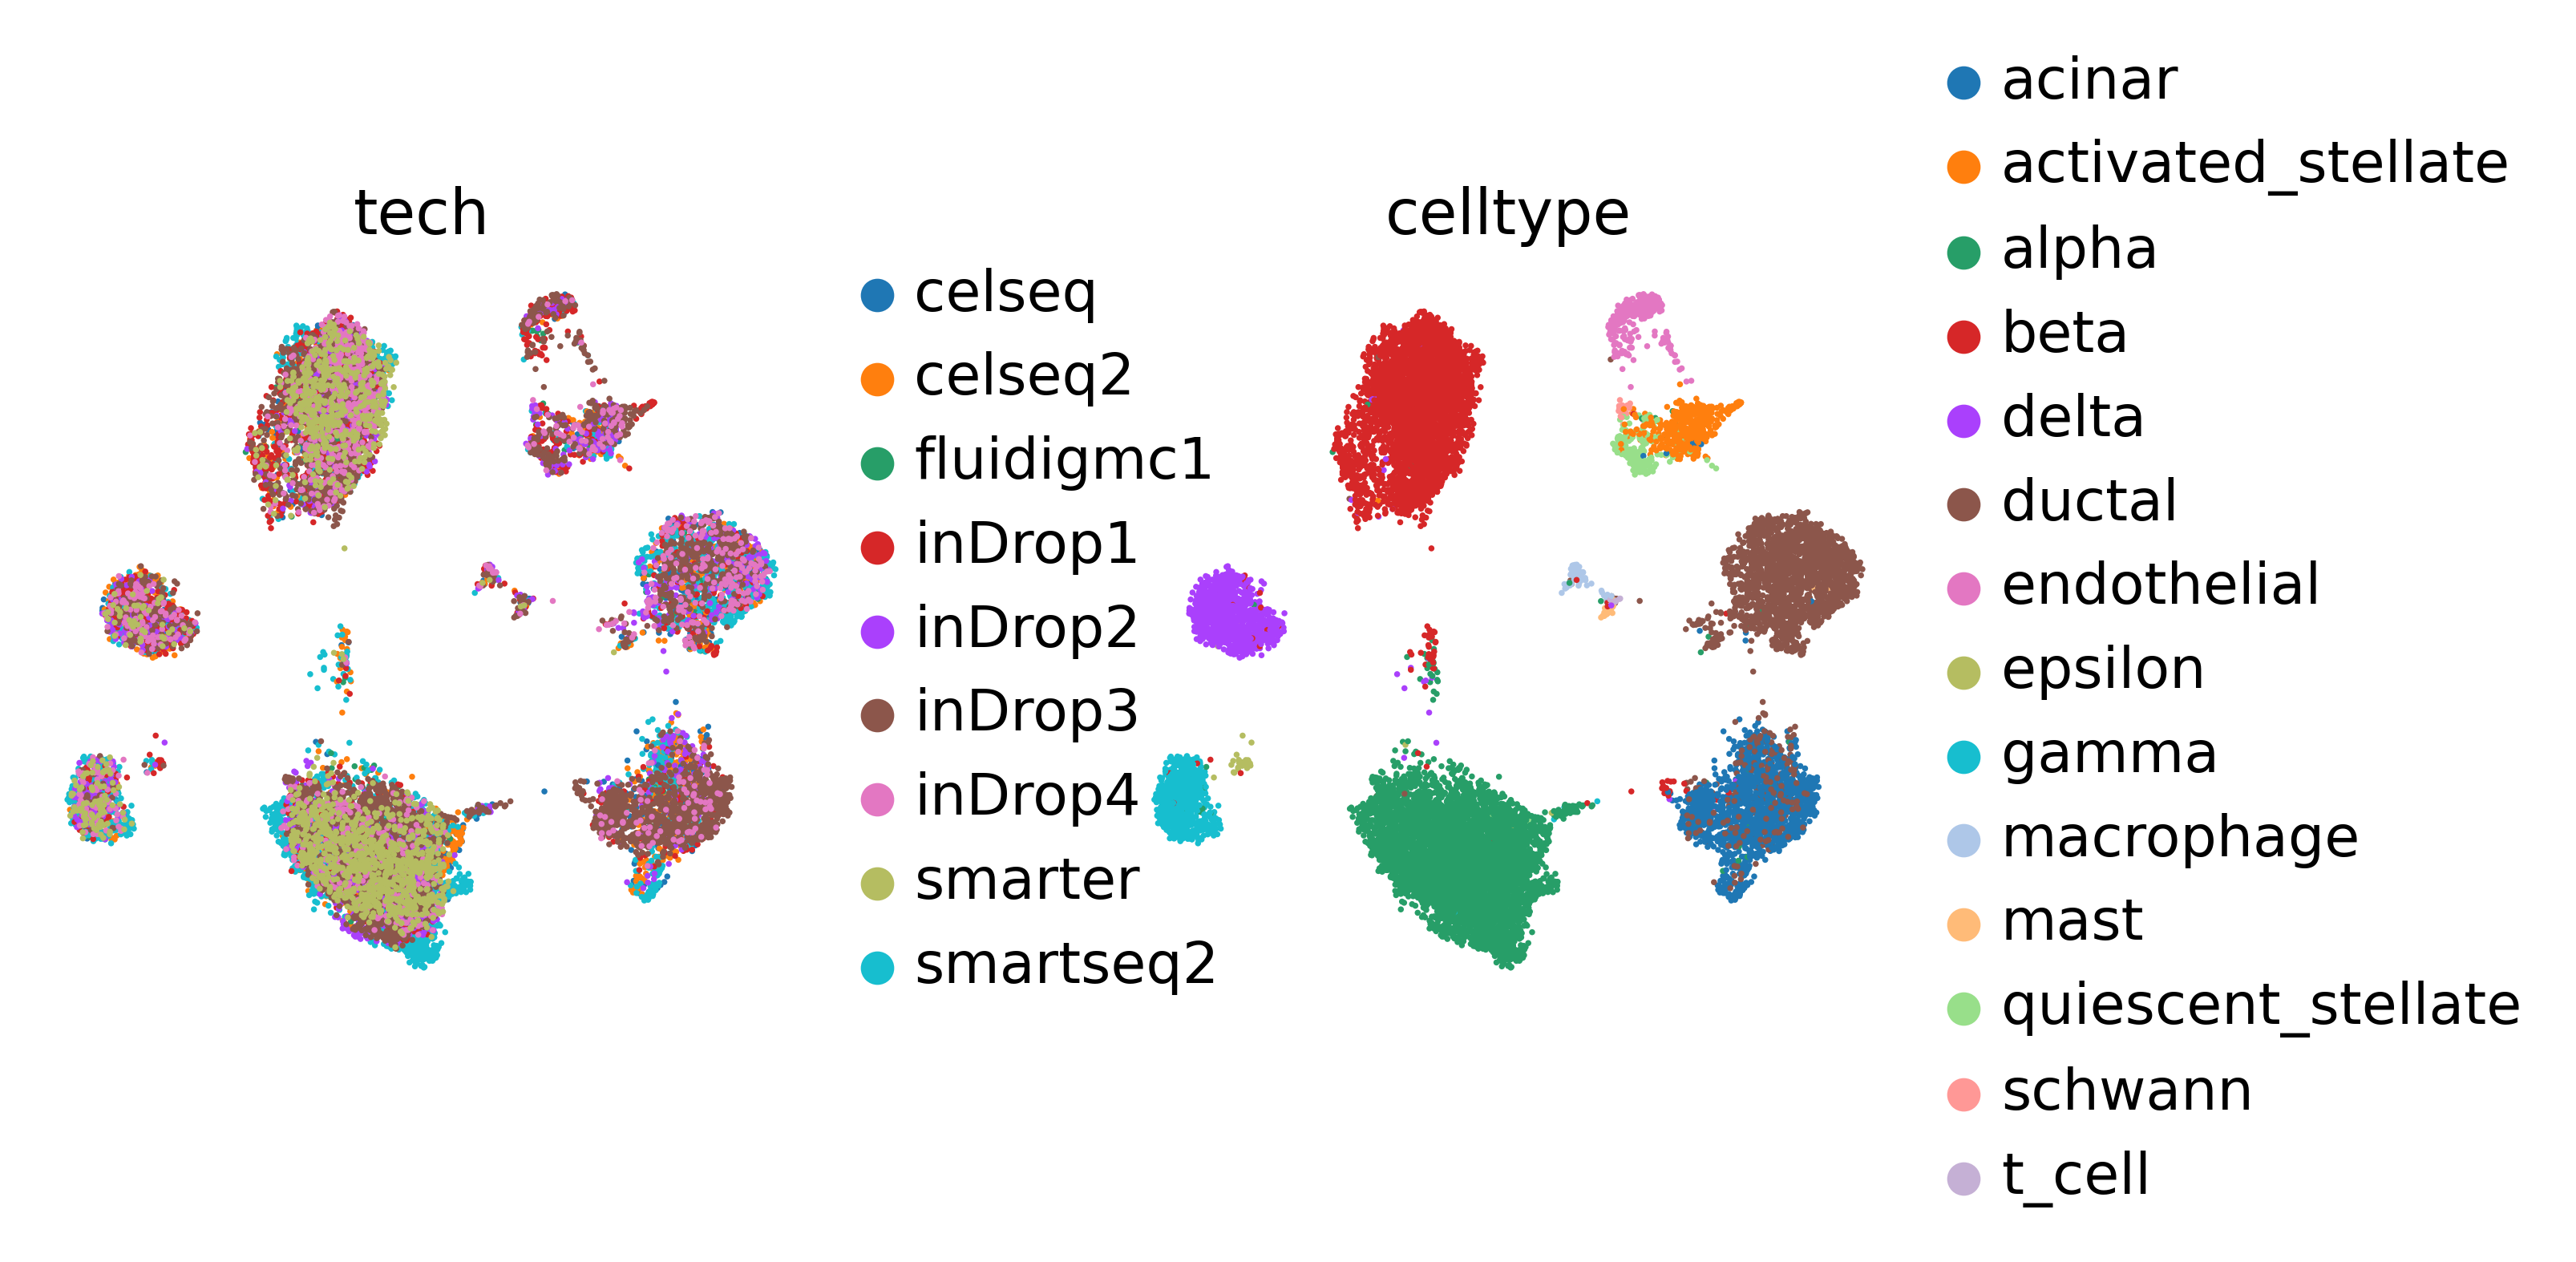

In [50]:
sc.pl.umap(adata, color=['tech', 'celltype'])

In [55]:
sc.tl.leiden(adata, resolution=0.2)

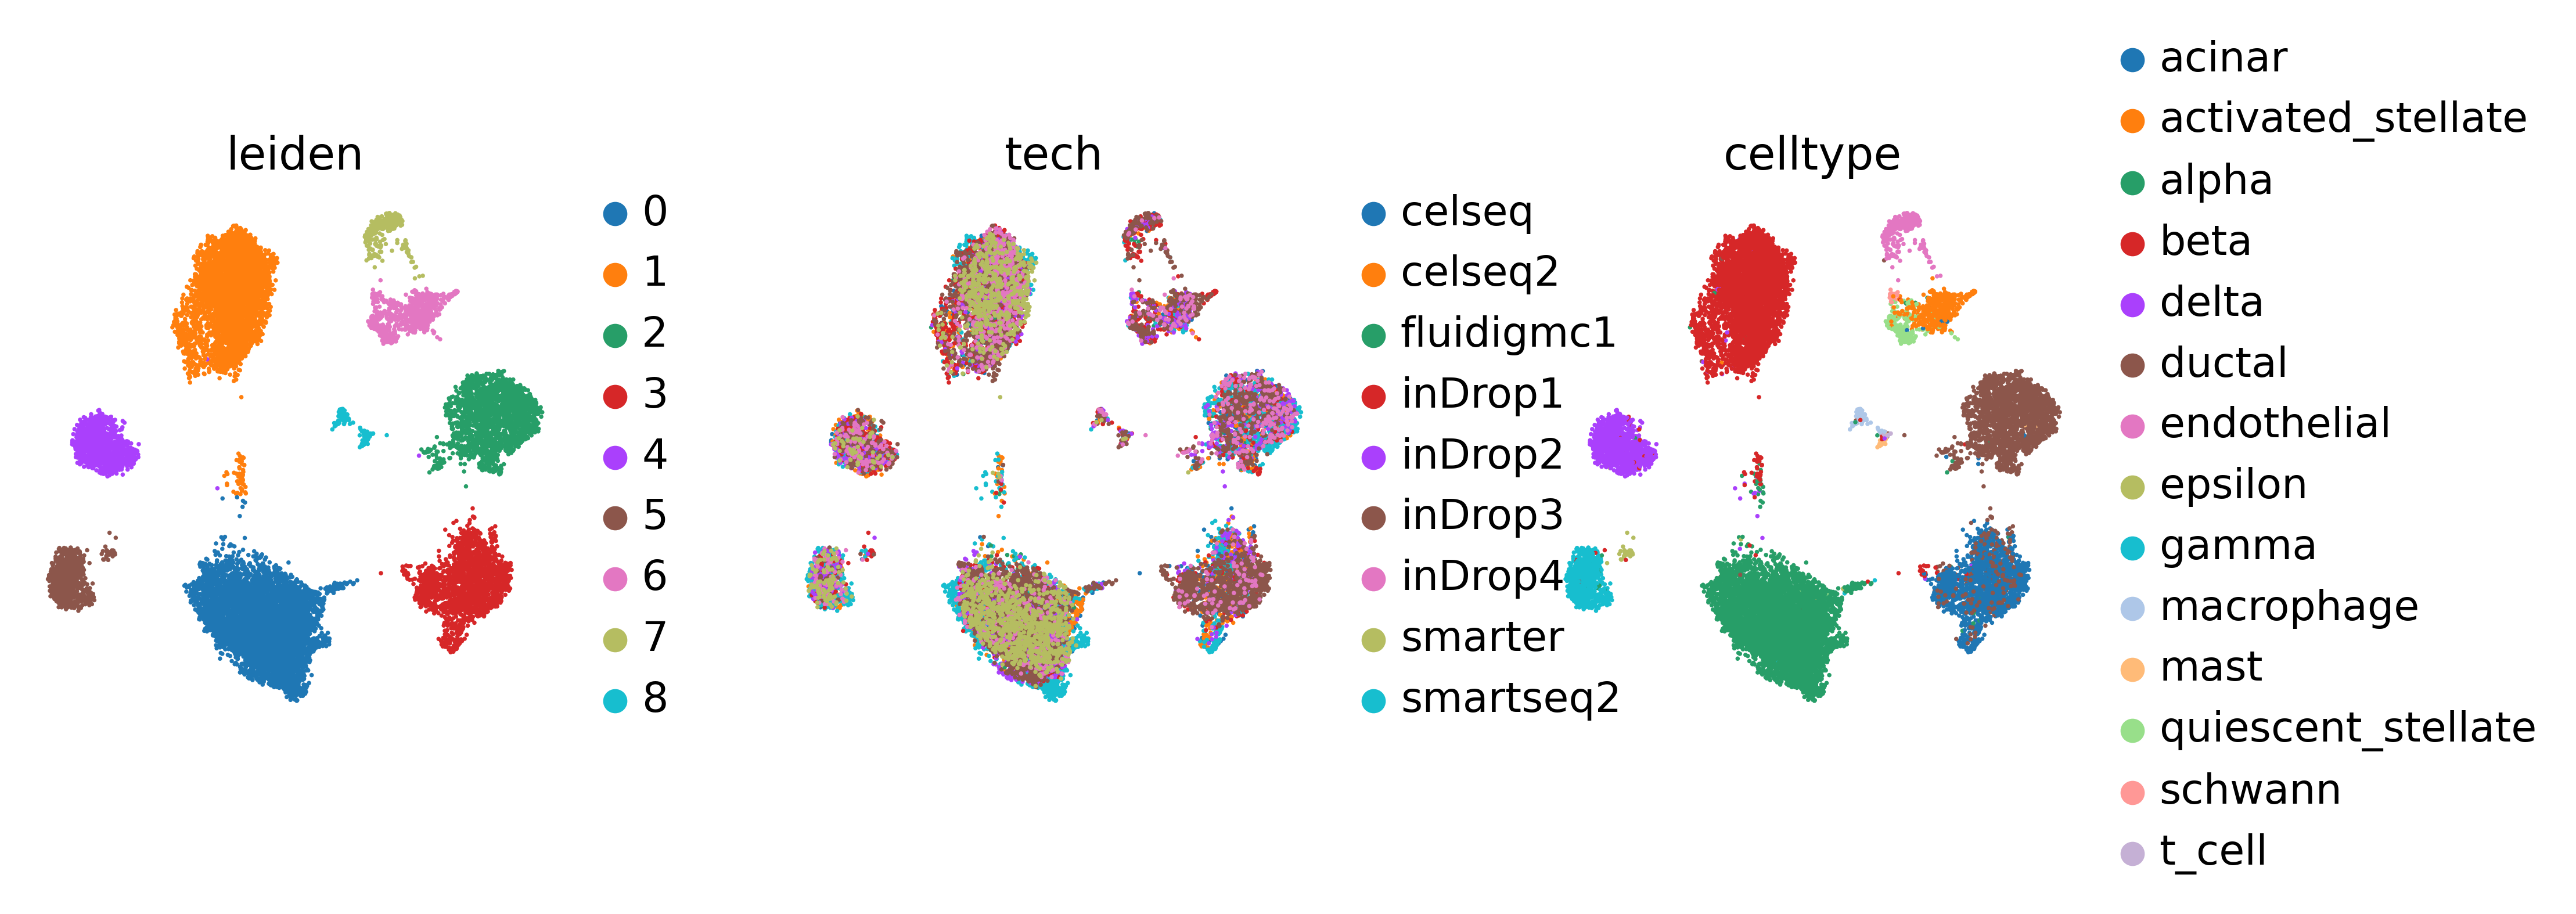

In [56]:
sc.pl.umap(adata, color=['leiden', 'tech', 'celltype'])

In [57]:
ari = scib.metrics.ari(adata, group1 = 'leiden', group2='celltype')
nmi = scib.metrics.nmi(adata, group1 = 'leiden', group2='celltype')
asw = scib.metrics.silhouette(adata, label_key='celltype', embed='X_pca_harmony')
b_asw = scib.metrics.silhouette_batch(adata, batch_key='tech', label_key='celltype', embed='X_pca_harmony', verbose=False)
print('ARI: {:.4f}, NMI: {:.4f}, ASW: {:.4f}, batch-ASW: {:.4f}'.format(ari, nmi, asw, b_asw))

/tmp/ipykernel_139461/4203551806.py:1: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  ari = scib.metrics.ari(adata, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_139461/4203551806.py:1: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  ari = scib.metrics.ari(adata, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_139461/4203551806.py:2: DeprecationWarning: Keyword argument 'group1' has been deprecated in favour of 'cluster_key'. 'group1' will be removed in a future version.
  nmi = scib.metrics.nmi(adata, group1 = 'leiden', group2='celltype')
/tmp/ipykernel_139461/4203551806.py:2: DeprecationWarning: Keyword argument 'group2' has been deprecated in favour of 'label_key'. 'group2' will be removed in a future version.
  nmi = scib.metrics.nmi(adata, group1 = 'leiden', group2='celltype')


ARI: 0.9538, NMI: 0.9213, ASW: 0.6375, batch-ASW: 0.8838


In [58]:
adata.write('/home/suyanchi/project/dab/results/batch/human_pancreas_bis.h5ad')

In [59]:
df = pd.read_csv('/home/suyanchi/project/dab/results/batch/human_pancreas_metric.csv', header=0, index_col=0)
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.941206,0.904867,0.634477,0.881469


In [60]:
# combineing results 
df1 = pd.DataFrame({'Methods': ['bis'],
                   'ARI': [ari],
                   "NMI": [nmi],
                   "ASW": [asw],
                   "b_ASW": [b_asw]})
df = pd.concat([df, df1])
df

,Methods,ARI,NMI,ASW,b_ASW
0,Dropout,0.941206,0.904867,0.634477,0.881469
0,bis,0.953803,0.921282,0.637546,0.883767


In [ ]:
df.to_csv('/home/suyanchi/project/dab/results/batch/human_pancreas_metric.csv', sep=',')